# Binary Classification

In a binary classification problem we usualy want to creat a learning model capable of predicting if some instance belongs to a class or not.

Binary classification models have a lot of practical applications like e-mail spam detection or medical testing (to diagnose if a pacient has a certain disease or not), for instance.

Formally, binary classification aims to learn a function *f(x)* that maps *x* (a vector of attributes for an instance) to a predicted binary outcome *ŷ* (0 or 1). Most of the classification algorithms output a probability for an instance that belongs to the positive class: *Pr(y=1|x)*.

(INTRODUZIR A PROXIMA PARTE)

## A/B Testing

A/B Testing is commonly used in marketing and web development as a fast way to analyse the satisfaction or efficiency of a given product/service and to test how to improve its performance.

In an A/B Test one of the attributes is changed in order to compare if the changed variable works better than the control variable for this specific situation.

For example: There's a website that sells online courses and they want to evaluate whether changing their homepage will increase the sales or not. 

In this tutorial we'll use this example. First of all, lets take a look at the A/B Test database used for this example:

### The database

In [ ]:
import pandas as pd
from pandas import read_csv
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as scs


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
db = read_csv('/content/drive/My Drive/ML - T7/Tutorial/ab_data.csv')
db

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
...,...,...,...,...,...
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0
294476,697314,2017-01-15 01:20:28.957438,control,old_page,0


The database has 5 columns:



1.   The *user_id* is the identification of the user; 
2.   The *timestamp* indicates when the user accessed the the website; 
3.   The *group* tells if the user was in the control or the treatment (test) group;
4.   The *landing_page* shows whether the user was exposed to the new homepage of the website or the old one;
5.   The *converted* column indicates if the user bought the online course (1) or not (0).

In this example we want to analyse if the change in the homepage affects the sales of this website, so the *control group* (or the A group) is the one with the *old_page* and the *treatment group* (or the B group) is the one with the *new_page*.

Since these are the only anilysed features, lets remove the *timestamp* column to make the dataframe cleaner:

In [ ]:
columns = ['user_id', 'group', 'landing_page', 'converted']
df = pd.read_csv('/content/drive/My Drive/ML - T7/Tutorial/ab_data.csv', usecols=columns)
df.head()

,user_id,group,landing_page,converted
0,851104,control,old_page,0
1,804228,control,old_page,0
2,661590,treatment,new_page,0
3,853541,treatment,new_page,0
4,864975,control,old_page,1


### Analysing the data

To start the analysis, let's take a look at a summary of the results using the pivot table function:

In [ ]:
ab_summary = df.pivot_table(values='converted', index='group', aggfunc=np.sum)
#Add additional columns to the pivot table:
ab_summary['total'] = df.pivot_table(values='converted', index='group', aggfunc=lambda x: len(x))
ab_summary['rate'] = df.pivot_table(values='converted', index='group')
ab_summary

,converted,total,rate
group,,,
control,17723,147202,0.120399
treatment,17514,147276,0.118920


We can compare the two groups by plotting the distributions of the *control group* and the *treatment group*.

We can assume that the distribution for our *control* and *treatment group* is binomial because the data is a series of Bernoulli trials, where each trial only has two possible outcomes. (In this case *converted* or *non-converted*, 0 or 1.)

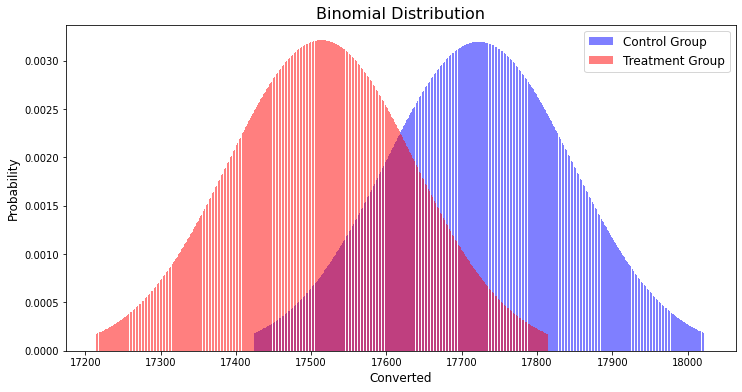

In [ ]:
#Binomial Distribution
#A => Control group
#B => Treatment group

#acessing dataframe data
A_converted=ab_summary.loc['control','converted'] 
A_total=ab_summary.loc['control','total']
A_rate=ab_summary.loc['control','rate']
B_converted=ab_summary.loc['treatment','converted']
B_total=ab_summary.loc['treatment','total']
B_rate=ab_summary.loc['treatment','rate']

#plot
fig, ax = plt.subplots(figsize=(12,6))
xA = np.linspace(A_converted-299, A_converted+300, 600)
yA = scs.binom(A_total, A_rate).pmf(xA)
ax.bar(xA, yA, alpha=0.5, color='blue', label='Control Group')
xB = np.linspace(B_converted-299, B_converted+300, 600)
yB = scs.binom(B_total, B_rate).pmf(xB)
ax.bar(xB, yB, alpha=0.5, color='red', label='Treatment Group')
plt.xlabel('Converted', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.title('Binomial Distribution', fontsize=16)
plt.legend(fontsize=12)

The first thing we notice is that the *treatment group* got less converted results than the *control group*. We can see it in the results. But when we look to the graph we can note the graphics are overlapping.

It is not necessarily a problem, it only means that the users who were exposed to the old homepage tended to purchase the course more than the users who were tested with the new homepage. Or maybe the changes are not so significantly.

But how can we be sure that the old homepage is definetelly better than the new one in the terms of sales? We should test it!

The **scipy** library allows us to programmatically run some tests:

In [ ]:
from scipy import stats 

treatment_results = df[df.group == 'treatment'].converted
control_results = df[df.group == 'control'].converted

treatment_result = stats.ttest_ind(treatment_results, control_results)
print(treatment_result)

Ttest_indResult(statistic=-1.2369207675839395, pvalue=0.21611748562490837)


And what does these numbers mean?



*   **T-statistic**: the first number represents the difference between averages of *treatment* and *control group* in units of standard error. The negative result means that the *control group* got more converted outcomes.
*  **P-value**: the second number measures the probability of the null hypothesis to be true.

Wait a minute, what is **null hypothesis**?

If null hypothesis is true, it means that there is no significant difference between the test and the control groups. So the lower p-value, the better. As the industry standard, it is acceptable that p-value < 5% makes the result statistically significant.

To check if our test with the new homepage is statistically significant or not, it's possible to build a function that says if the result of the null hypothesis is significant or not and apply it to our dataset:

In [ ]:
def eval_test(treatment_results, control_results):
    treatment_result = stats.ttest_ind(treatment_results, control_results)
    if treatment_result[1] < 0.05:
        print('result is significant')
    else:
        print('result is not significant')

eval_test(treatment_results, control_results)

result is not significant


This result it's not a surprise, since our p-value was 0.2161 or 21.61%.

It is important to say that a 'not significant result' here doesn't mean that our analysis didn't work. It means that we can't prove that the lower coverted outcomes in the *treatment group* was due to the change in the testing variable. In other words, this means that we can't say the new homepage necessarily made the sales decrease. In a real life situation, more tests would be necessary to make a business decision about the homepage layout.

## Metrics

In general, a classification metric can be understood as an indicator that measures the performance of a specific machine learning model when it comes to assigning observations to certain classes. In this sense, binary classification is a situation in which you only need to have two classes: "positive" and "negative".
This performance is commonly presented in a range from 0 to 1, which 1 is understood as the exact and perfect model.

The three main metrics used are to measure three important and essential parameters of a model: accuracy, sensitivity and precision. However, there are others that are also commonly used and that will be covered in this tutorial, which are: TPR, ROC AUC score and Confusion Matrix.
It is worth mentioning that, for the calculation of some metrics, there are what are called preliminary metrics, which will be important and crucial for obtaining the others. These are:
*   True Positive (TP): truth label is positive and predicted label is also positive
*   True Negative (TN): truth label is negative and predicted label is also negative
*   False Positive (FP): truth label is negative but predicted label is positive
*   False Negative (FN): truth label is positive but predicted label is negative


To check the performance metrics of the binary classification, we chose a database of the population who had diabetes in India. The "Outcome" column indicates whether the specific person has diabetes or not and the "predicted" column shows the result of a prediction made (the prediction process will not be explained for the purpose of narrowing the scope of the tutorial). Basically, the metrics will tell us whether the prediction was satisfactory or not.

In [13]:
import pandas as pd
import sklearn as sk
import sklearn.metrics as sk_metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import datasets, metrics, model_selection, svm
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt 
import seaborn as sns

diabetes_data = pd.read_csv('/content/sample_data/diabetes_predicted.csv')
print(diabetes_data.shape)
diabetes_data.head(5)

(768, 12)


,Unnamed: 0,Unnamed: 0.1,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,predicted
0,0,0,6,148,72,35,0,33.6,0.627,50,1,0
1,1,1,1,85,66,29,0,26.6,0.351,31,0,0
2,2,2,8,183,64,0,0,23.3,0.672,32,1,1
3,3,3,1,89,66,23,94,28.1,0.167,21,0,1
4,4,4,0,137,40,35,168,43.1,2.288,33,1,1


The "first step" in the calculation of the metrics will be the calculation of the quantitative for the variables of TP, TN, FP and FN.

In [3]:
diabetes_data.groupby(["Outcome", "predicted"]).size().unstack()

predicted,0,1
Outcome,,
0,266,234
1,124,144


### Confusion Matrix
A way to see the results graphically is using the Confusion Matrix, which It is a common way of presenting true positive (TP), true negative (TN), false positive (FP) and false negative (FN) predictions. Those values are presented in the form of a matrix where the Y-axis shows the true classes while the X-axis shows the predicted classes.

Text(0.5, 15.0, 'Predicted Values (predicted)')

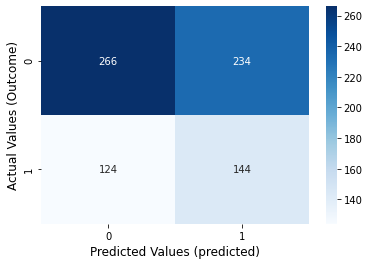

In [14]:
#creating the Confusion Matrix object (cm)
cm = confusion_matrix(diabetes_data['Outcome'], diabetes_data['predicted'])
cmap = plt.get_cmap('Blues')
sns.heatmap(cm, cmap=cmap, annot=True, fmt='g', ax=None)
plt.ylabel('Actual Values (Outcome)', fontsize=12)
plt.xlabel('Predicted Values (predicted)', fontsize=12)

As we can see above, when the person had diabetes (Outcome = 1), the prediction detected 144 true (predicted = 1) records. Therefore, the variable TP is equal to 144. Similarly, we have the variables TN, FP and FN equal to 266, 234 and 124, respectively. To get this values, we can use the method ravel:

In [15]:
TN, FP, FN, TP = cm.ravel()
print('TN:  %f' % TN)
print('FP:  %f' % FP)
print('FN:  %f' % FN)
print('TP:  %f' % TP)

TN:  266.000000
FP:  234.000000
FN:  124.000000
TP:  144.000000


### Recall
The recall indicates the true positive rate on the true positive labels. The value is calculated by the following equation:


*   Recall = TP/(TP+FN)


Analytically, the recall is intuitively the ability of the classifier to find all the positive samples and measures to us how many observations out of all positive observations have we classified as positive. Taking our diabetes database example, it tells us how many people with diabetes desease we recalled from all people with diabetes. It's also called as True Positive Rate (TPR)

In [16]:
recall = TP/(TP+FN)
recall

0.5373134328358209

The above value means that about 54% of the positive values were identified by the predictor

### Precision
Precision indicates the true positive rate in positive predictive labels. The value is computed by the following equation:


*   Precision = TP/(TP+FP)



In [17]:
precision = TP/(TP+FP)
precision

0.38095238095238093

### F1-Score
The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is:

*   F1 = 2 * (precision * recall) / (precision + recall)

Just to notice, for all this metrics shown, we can manually implement the equation or use the existing package of the scikit-learn. We will show both ways this time just to compare it:

In [19]:
#Using Scikit-learn package
F1_score_sk = sk_metrics.f1_score(diabetes_data['Outcome'], diabetes_data['predicted'])
F1_score_manually = 2* ((precision*recall)/(precision+recall))
print('F1-Score - Scikit: %f' % F1_score_sk)
print('F1-Score - Manually: %f' % F1_score_manually)

F1-Score - Scikit: 0.445820
F1-Score - Manually: 0.445820


As we can see, both the examples is equal.

### Accuracy
Accuracy is the ratio of number of correct predictions to the total number of input samples. To calculate it, the following formula is used: 
*   Accuracy = (TP+TN)/(TP+TN+FP+FN)

Basically, to better understand: 


*   "Number of correct predictions"/"Total number of predictions made"

Similarly to the F1-Score we can calculate it manually (by the formula) or by the sklearn package. Both the results will be the same. 


In [20]:
sk_metrics.accuracy_score(diabetes_data['Outcome'], diabetes_data['predicted'])

0.5338541666666666

This result means that 53% of the predictions were right.

### ROC AUC Score
The probabilistic interpretation of ROC-AUC score is that if we randomly choose a positive case and a negative case, the probability that the positive case outranks the negative case according to the classifier is given by the AUC. Here, rank is determined according to order by predicted values.
Generally, the ROC AUC predictions follows this:
* 90-1 = Excellent
* 80-.90 = Good
* 70-.80 = Fair
* 60-.70 = Poor
* 50-.60 = Fail

In [21]:
roc_auc = roc_auc_score(diabetes_data['Outcome'], diabetes_data['predicted'])
roc_auc

0.5346567164179105

Finally, as we can see, many of our metrics were below 50% (accuracy, F1-Score ...). In particular, the value of our ROC-AUC also called into question the prediction model employed. It is important to analyze all the metrics and see if the results make sense. It is not because only one metric gave a bad / unexpected result that the model was not satisfactory. In our case, as several metrics were left with a low value, it can be assumed that the prediction model employed was not satisfactory.

## Class Balancing

Imbalanced classes are a common problem in machine learning, specifically in classification. This occurres when the dataset used has a disproportionate ratio of observations in each class. Therefore, standard accuracy no longar reliably measures performance.

To ilustrate this, we will use a dataset from [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets/balance+scale) called 'Balance Scale Dataset'. It contains the information whether a scale is balanced or not based on the weights of the variables var1, var2, var3 and var4. The balance attribute can have three outcomes:

1.   R when var3.var4 > var1.var2 (heavy right)
2.   B when var1.var2 = var3.var4 (balanced)
3.   L when var1.var2 > var3.var4 (heavy left)

In [ ]:
df_cb = pd.read_csv('/content/drive/My Drive/ML - T7/Tutorial/balance-scale.data', names=['balance','var1','var2','var3', 'var4'])
df_cb.head()

,balance,var1,var2,var3,var4
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5


Let's observe how the balance attribute is distributed.

In [ ]:
df_cb.balance.value_counts()

R    288
L    288
B     49
Name: balance, dtype: int64

We need to make a few changes to the attribute 'balance' in order to turn this dataset into a binary classification problem. Let's consider two possible classes:


*   0 (negative class) if the scale is not balanced (either L or R) 
*   1 (positive class) if the scale is balanced (B)

Class 0: 576
Class 1: 49
Proportion: 11.76 :1


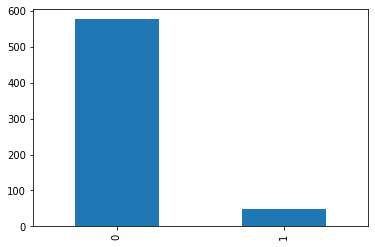

In [ ]:
df_cb.balance = [1 if x=='B' else 0
                 for x in df_cb.balance]
target_count = df_cb.balance.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0]/target_count[1], 2), ':1')
target_count.plot(kind='bar')

As we can see from the graph above, we have and imbalanced dataset, considering that the amount of observations of one class (negative class 0) is disproportionately higher than the other class (positive class 1), with a proportion ratio of 11,76 : 1.

We will now implement a Logistic Regression algorithm with the Scikit-Learn library to see how accurate the predictions will be using the imbalanced dataset we have just adjusted to be of binary classification.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

y = df_cb.balance                                         # y will be our target variable
x = df_cb.drop('balance', axis = 1)                       # x will be the input features (var1, var2, var3 and var4)

# training model
clf_0 = LogisticRegression().fit(x,y)

# prediction on training set
pred_y_0 = clf_0.predict(x)

# Accuracy of the trained model
print(accuracy_score(y, pred_y_0))

0.9216


So after implementing the Logistic Regression algorithm, we ended up with a model with 92% accuracy. Great, right?!

Well... not really. As we showed before, the class we predicted was imbalanced, and we can expect the model to only predict the majority class. Let's confirm that by checking the unique values of our predictions.

In [ ]:
print(np.unique(pred_y_0))

[0]


As we expected, the model is only predicting the class 0, which is our majority class to a very high proportion. We used a very simple model, but it is likely that this problem would still occur if we don't use techniques for imbalanced classes.

### Colect mor data - if possible

A larger dataset might expose a different and more balanced perspective on the classes we are analysing. For that reason, it's interesting to see if there's a possibility of obtaining a bigger set of data.

Collecting more data might not be enough to solve the problem of imbalanced classes, but will certanly be useful in other techniques we will discuss, such as resampling the dataset.

### Resample the dataset

There are basicaly two aproaches we can take when resampling our dataset. We can **down-sample the majority class**, meaning randomly removing observations from the majority class to even out the ratio of observations, or **up-sample the minority class**, meaning randomly duplicating observations from the minority class for the same reason. We will take a look at both of them.

#### Down-sample the majority class

In this method, we will resample the dataset without replacement using the utility **resample** from scikit-learn. We need to create two datasets to separate the observations from each class and then resample the dataset with the majority class in order to set the numeber of samples to match that of the minority class. As we analysed before, the minority class has 49 samples, therefore our new dataset for the observations of the majority class must also have 49 samples.

In [ ]:
from sklearn.utils import resample

df_majority = df_cb[df_cb.balance == 0]                                                       # classes separated between the two new datasets.
df_minority = df_cb[df_cb.balance == 1]

df_majority_ds = resample(df_majority, replace = False, n_samples = 49, random_state = 0)     # downsampling to 49 samples

df_ds = pd.concat([df_majority_ds, df_minority])                                              # new balanced dataset

ds_count = df_ds.balance.value_counts()
print('Class 0:', ds_count[0])
print('Class 1:', ds_count[1])
print('Proportion:', round(ds_count[0]/ds_count[1], 2), ':1')

Class 0: 49
Class 1: 49
Proportion: 1.0 :1


Now, the dataframe has fewer observations but the proportion between the classes is 1:1. Let's see how this dataset will perform aplying a Logistic Regression model.

In [ ]:
y = df_ds.balance
x = df_ds.drop('balance', axis=1)

clf_1 = LogisticRegression().fit(x,y)
pred_y_1 = clf_1.predict(x)

print(np.unique(pred_y_1))
print( accuracy_score(y, pred_y_1))

[0 1]
0.5816326530612245


We are off to a good start because now we can see that the model is able to predict both classes. However, the accuracy found with this method is way lower than the one previously found using the imbalanced data - numerically that might be true, but we can rest assured that this 58% accuracy score portrays a more reasonable number than the 92%. We can also look at different metrics to evaluate the quality of the model, as shown in the Metrics section.

Also, it would be better to validate the model with unseen test data but that is not a topic we will dive into in this tutorial.

#### Up-sample minority class

This technique is basically the oposite of down-sampling the majority class. Again using the utility **resample** from scikit-learn, we saparate the classes into two different dataframes but now resample with replacement the minority class in order to set the number of samples to match that of the majority class. As we analysed before, the majority class has 576 samples, therefore our new dataset for the observations of the minority class must also have 576 samples.

In [ ]:
# we already imported resample and have the datasets
## df_majority 
## df_minority                                              

df_minority_us = resample(df_minority, replace = True, n_samples = 576, random_state = 0)     # upsampling to 576 samples

df_us = pd.concat([df_minority_us, df_majority])                                              # new balanced dataset
#df_ds['balance'].value_counts()

us_count = df_us.balance.value_counts()
print('Class 0:', us_count[0])
print('Class 1:', us_count[1])
print('Proportion:', round(us_count[0]/us_count[1], 2), ':1')

Class 0: 576
Class 1: 576
Proportion: 1.0 :1


Now, the dataframe has more observations and the proportion between the classes is 1:1. With the same mindset we used to the downsampling method, let's apply a Logistic Regression model to this new upsampled dataset.

In [ ]:
y = df_us.balance
x = df_us.drop('balance', axis=1)

clf_2 = LogisticRegression().fit(x,y)
pred_y_2 = clf_2.predict(x)

print(np.unique(pred_y_2))
print(accuracy_score(y, pred_y_2))

[0 1]
0.5260416666666666


Again, we are off to a good start now that the model is able to predict both classes. However, we face the same challenge as with the downsampling model - the accuracy score took a dive. Again, we can consider this metric to be more realistic than the 92% previously found with the imbalanced data, but we should also consider applying different metrics and other models to see if we can increase the quality of our predictions.

Once again, it would be better to validate the model using unseen data, but that is not a topic we will aproach in this tutorial. 

### Tree-based algorithms - RandomForestClassifier

Thee-based algorithms tend to perform well on imbalanced datasets because their hierarchical structure allows them to learn signals from both classes. We will use RandomForestClassifier to see how well it performs on our original imbalanced dataset.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

y = df_cb.balance
x = df_cb.drop('balance', axis=1)

clf_3 = RandomForestClassifier()
clf_3.fit(x,y)

pred_y_3 = clf_3.predict(x)

print(np.unique(pred_y_3))
print(accuracy_score(y, pred_y_3))

[0 1]
1.0


The model was able to predict both classes and ended up with 100% accuracy of the prediction! It does sound great, **however**... We would still need to test the prediction with a set of unseen data, but it does look better than our first Logistic Regression model with the imbalanced data.

It's important to notice that we can also make a more complex use of Random Forest as imbalanced classification with techniques such as:

*   Random Forest with Class Weighting
*   Random Forest with Bootstrap Class Weighting
*   Random Forest with Random Undersampling

### Other Techniques and Conclusion

There's no shortage of techniques for handeling imbalaced classes. It is possible to change the metrics to better evaluate the data and the model (Confusion Matrix, Precision, Recall, F1 Score, ROC Cuves...), we can create synthetic samples (SMOTE algorithm - synthetic minority over-sampling technique), use differente algorithms and even penalized models.

What's important here is to understand that imbalace is common and there are many ways you can tackle it. It might take a while to analyse what the best strategy is, but there's a way out.

For good references on how to tackle imbalanced data, check out [Imbalanced-learn.org](https://imbalanced-learn.org/stable/).